In [15]:
#Задание 1
#На основании датасета для каждого покупателя получите:
# - предпочитаемый метод оплаты (определен как для выполненных, так и для отмененных заказов:
#   отмененные заказы также демонстрируют тенденции выбора покупателя)

import pandas as pd

file = pd.read_csv('Electronic_sales_Sep2023-Sep2024.csv')

preferred_payment_method = {}
customers = file['Customer ID'].unique()

for customer in customers:  
    customer_data = file[file['Customer ID'] == customer]    
    payment_method_counts = customer_data['Payment Method'].value_counts()
    preferred_method = payment_method_counts.index[0]
    preferred_payment_method[customer] = preferred_method
    
preferred_payment_method_df = pd.DataFrame(list(preferred_payment_method.items()), columns=['Customer ID', 'Preferred Payment Method'])

# - общие траты (только для выполненных заказов, учитывая, что стоимость отмененных заказов не была выплачена => тратой не является);

completed_orders = file[file['Order Status'] == 'Completed']

total_spendings = completed_orders.groupby('Customer ID')['Total Price'].sum()
total_spendings_df = pd.DataFrame([[i, j] for i, j in total_spendings.items()], columns=['Customer ID', 'Total Spendings'])

# - количество денег, потраченных на дополнительные услуги и аксессуары
#   (только для выполненных заказов, учитывая, что стоимость отмененных заказов не была выплачена => тратой не является).

add_on_spendings = completed_orders.groupby('Customer ID')['Add-on Total'].sum()
add_on_spendings_df = pd.DataFrame([[i, j] for i, j in add_on_spendings.items()], columns=['Customer ID', 'Add-on Spendings'])

#Объединенный датафрейм

merged_customer_data_df = pd.merge(pd.merge(preferred_payment_method_df, total_spendings_df, on='Customer ID'), add_on_spendings_df, on='Customer ID')

#Вывод нескольких строк для проверки работы программы
print(merged_customer_data_df.head())

   Customer ID Preferred Payment Method  Total Spendings  Add-on Spendings
0         1000              Credit Card           741.09             26.09
1         1002              Credit Card          5020.60             60.16
2         1003                     Cash            41.50             35.56
3         1004              Credit Card            83.00             65.78
4         1005                   Paypal         11779.11             75.33


In [16]:
#Задание 2
#1. На основании датасета получите доход:
# - по каждому методу доставки (с учетом трат на дополнительные услуги, т.к. доставка распространяется и на них), 
# - по каждому типу продукта (только с учетом стоимости товаров без дополнительных услуг, т.к. нас интересуют конкретные типы продуктов), 
# - по дополнительным услугам за каждый месяц,
# - по дополнительным услугам за каждый квартал. 
#2. Отобразите полученные данные на графике.

import pandas as pd

file = pd.read_csv('Electronic_sales_Sep2023-Sep2024.csv')
data = file.copy()

data['Purchase Date'] = pd.to_datetime(data['Purchase Date'])
data['Month'] = data['Purchase Date'].dt.month
data['Year'] = data['Purchase Date'].dt.year
data['Quarter'] = data['Purchase Date'].dt.quarter

completed_orders = data[data['Order Status'] == 'Completed']

profit_by_shipping_type = completed_orders.groupby('Shipping Type')[['Total Price', 'Add-on Total']].sum().sum(axis=1)
profit_by_shipping_type_df = pd.DataFrame([[stype, profit] for stype, profit in profit_by_shipping_type.items()], columns=['Shipping Type','Profit'])
print('Доход по каждому методу доставки')
print(profit_by_shipping_type_df)
print()

profit_by_product_type = completed_orders.groupby('Product Type')['Total Price'].sum()
profit_by_product_type_df = pd.DataFrame([[ptype, profit] for ptype, profit in profit_by_product_type.items()], columns=['Product Type', 'Profit'])
print('Доход по каждому типу продукта')
print(profit_by_product_type_df)
print()

month_profit_by_add_ons = completed_orders.groupby(['Year', 'Month'])['Add-on Total'].sum()
month_profit_by_add_ons_df = pd.DataFrame([[year, month, profit] for (year, month), profit in month_profit_by_add_ons.items()], columns=['Year', 'Month', 'Profit'])
print('Доход по дополнительным услугам за каждый месяц')
print(month_profit_by_add_ons_df)
print()

quarter_profit_by_add_ons = completed_orders.groupby(['Year', 'Quarter'])['Add-on Total'].sum()
quarter_profit_by_add_ons_df = pd.DataFrame([[year, quarter, profit] for (year, quarter), profit in quarter_profit_by_add_ons.items()], columns=['Year', 'Quarter', 'Profit'])
print('Доход по дополнительным услугам за каждый квартал')
print(quarter_profit_by_add_ons_df)
print()

Доход по каждому методу доставки
  Shipping Type       Profit
0     Expedited   8610437.09
1       Express   5725863.77
2     Overnight   5982983.40
3      Same Day   8469574.60
4      Standard  14676351.95

Доход по каждому типу продукта
  Product Type       Profit
0   Headphones   2734651.00
1       Laptop   8365905.25
2   Smartphone  14407835.84
3   Smartwatch   9398591.23
4       Tablet   7722632.25

Доход по дополнительным услугам за каждый месяц
    Year  Month    Profit
0   2023      9   5337.61
1   2023     10  26153.21
2   2023     11  24453.33
3   2023     12  22750.23
4   2024      1  93254.95
5   2024      2  80253.72
6   2024      3  84713.93
7   2024      4  82294.06
8   2024      5  89374.18
9   2024      6  84648.60
10  2024      7  88811.55
11  2024      8  87861.11
12  2024      9  65688.76

Доход по дополнительным услугам за каждый квартал
   Year  Quarter     Profit
0  2023        3    5337.61
1  2023        4   73356.77
2  2024        1  258222.60
3  2024        2 

<Axes: title={'center': 'Доход по каждому методу доставки'}, xlabel='Shipping Type', ylabel='Profit (10M)'>

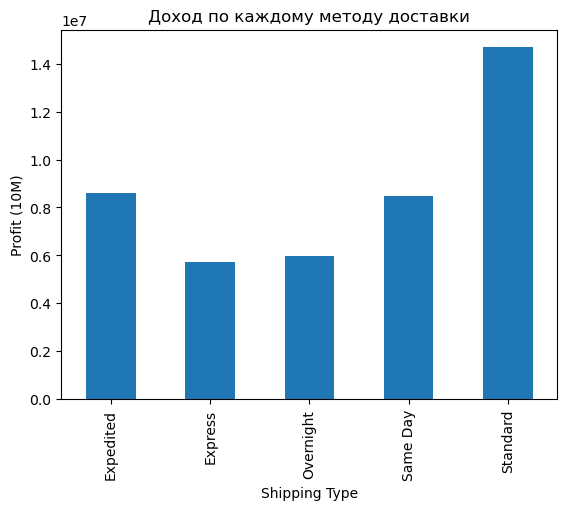

In [17]:
profit_by_shipping_type.plot(kind='bar', title='Доход по каждому методу доставки', ylabel='Profit (10M)')

<Axes: title={'center': 'Доход по каждому типу продукта'}, xlabel='Product Type', ylabel='Profit (10M)'>

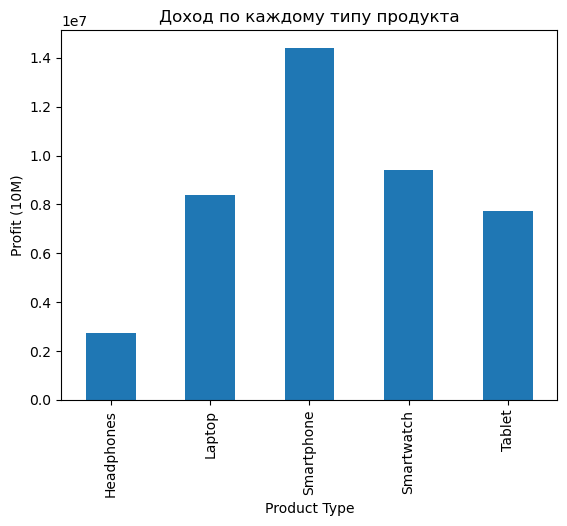

In [18]:
profit_by_product_type.plot(kind='bar', title='Доход по каждому типу продукта', ylabel='Profit (10M)')

<Axes: title={'center': 'Доход по дополнительным услугам за каждый месяц'}, xlabel='Year,Month', ylabel='Profit'>

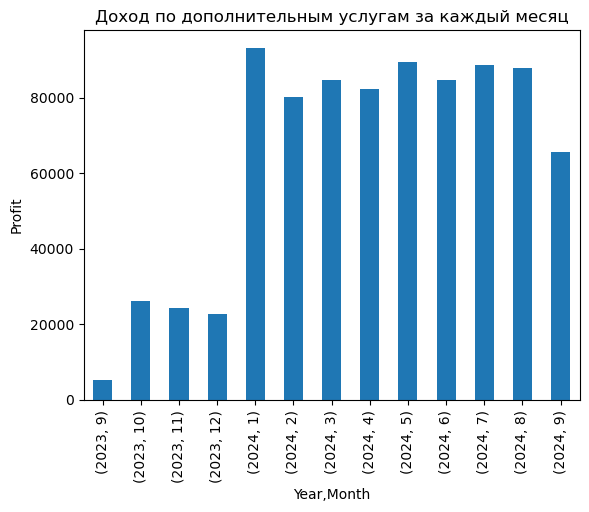

In [19]:
month_profit_by_add_ons.plot(kind='bar', title='Доход по дополнительным услугам за каждый месяц', ylabel='Profit')

<Axes: title={'center': 'Доход по дополнительным услугам за каждый квартал'}, xlabel='Year,Quarter', ylabel='Profit'>

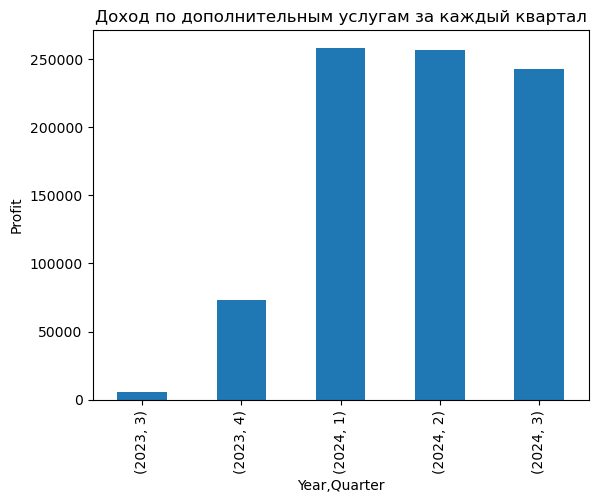

In [20]:
quarter_profit_by_add_ons.plot(kind='bar', title='Доход по дополнительным услугам за каждый квартал', ylabel='Profit')